In [9]:
import pandas as pd
import os
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [10]:
#combining no of csv file into one file with name combine_csv
os.chdir('C:/Users/LILA\Desktop/RTT-RSS with Kalman_offset/Offset new')
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
df=combined_csv
df

,True_Range,Est_Range,stdev,RSSI,Final_range,Raw_error,Callibrated_data_error
0,10,10.178,0.674,-72,9.892809,-0.178,0.107191
1,10,10.452,0.142,-67,10.166809,-0.452,-0.166809
2,10,10.803,0.077,-72,10.517809,-0.803,-0.517809
3,10,10.530,0.194,-71,10.244809,-0.530,-0.244809
4,10,10.647,0.083,-67,10.361809,-0.647,-0.361809
...,...,...,...,...,...,...,...
291,9,8.655,0.125,-60,8.246145,0.345,0.753855
292,9,8.538,0.173,-60,8.129145,0.462,0.870855
293,9,8.420,0.182,-60,8.011145,0.580,0.988855
294,9,8.655,0.112,-60,8.246145,0.345,0.753855


In [11]:
raw_error= (df.Raw_error)
callibrated_error=(df.Callibrated_data_error)
print('Mean error with Callibrated data:',np.mean(callibrated_error))
print('Mean error with Raw data:',np.mean(raw_error))

Mean error with Callibrated data: 0.5770202867189553
Mean error with Raw data: 0.18461820394915002


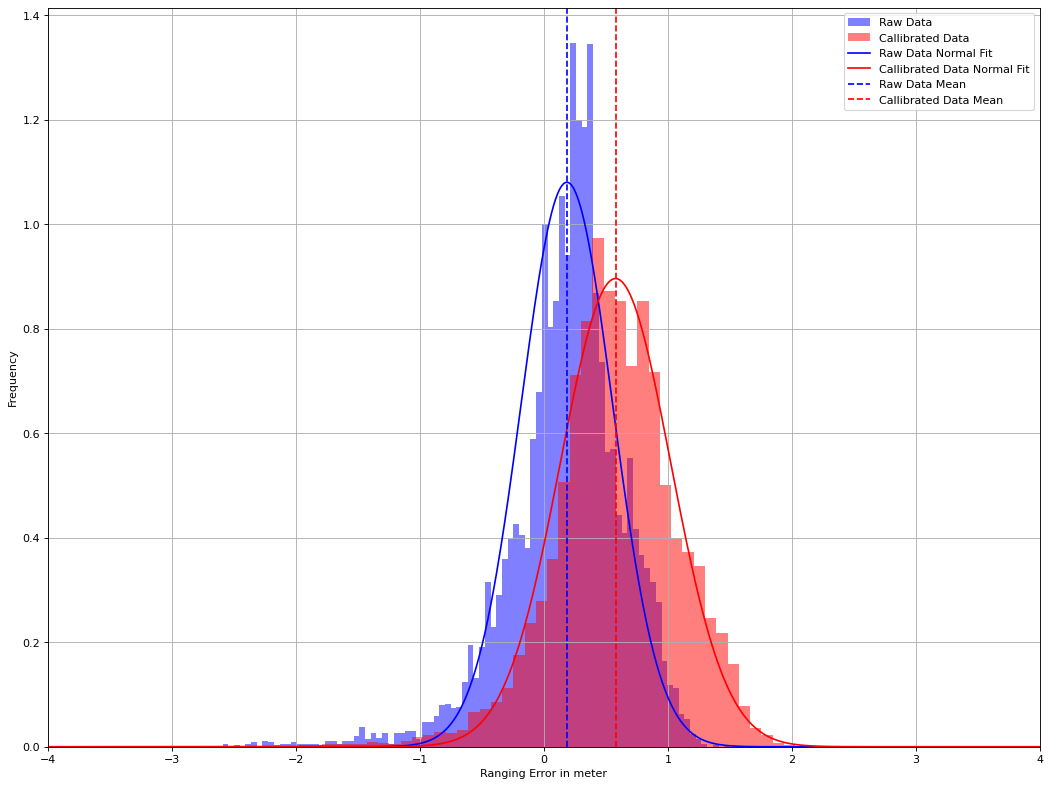

In [12]:
from scipy.stats import norm
from matplotlib.pyplot import figure

data1 = raw_error
data2 = callibrated_error
# bins1 = int(np.ceil((max(data1) - min(data1)) / (3.5 * np.std(data1) * len(data1)**(-1/3))))
# bins2 = int(np.ceil((max(data2) - min(data2)) / (3.5 * np.std(data2) * len(data2)**(-1/3))))

#Alternatively, calculate number of bins using Freedman-Diaconis rule
bins1 = int(np.ceil((max(data1) - min(data1)) / (2 * np.percentile(data1, 75 - np.percentile(data1, 25)) * len(data1)**(-1/3))))
bins2 = int(np.ceil((max(data2) - min(data2)) / (2 * np.percentile(data2, 75 - np.percentile(data2, 25)) * len(data2)**(-1/3))))


figure(figsize=(16,12),dpi=80)
plt.hist(raw_error, bins=bins1, alpha=0.5, density=True, color='blue', label='Raw Data')
plt.hist(callibrated_error, bins=bins2, alpha=0.5, density=True, color='red', label='Callibrated Data')

# plt.hist(raw_error, bins=bins1, alpha=0.5, density= False, color='blue', label='Raw Data')
# plt.hist(callibrated_error, bins=bins2, alpha=0.5, density= False, color='red', label='Callibrated Data')



plt.legend(loc='upper right')
plt.xlabel('Ranging Error in meter')
plt.ylabel('Frequency')


xmin, xmax = plt.xlim(-4,4) 
x = np.linspace(xmin, xmax, 1000) #for gaussian plot
plt.plot(x, norm.pdf(x, np.mean(raw_error), np.std(raw_error)*0.8), 'b-', label='Raw Data Normal Fit')
plt.plot(x, norm.pdf(x, np.mean(callibrated_error), np.std(callibrated_error)*0.9), 'r-', label='Callibrated Data Normal Fit')
plt.legend(loc='upper right')

plt.axvline(np.mean(raw_error), color='blue', linestyle='--', label='Raw Data Mean')
plt.axvline(np.mean(callibrated_error), color='red', linestyle='--', label='Callibrated Data Mean')
plt.legend()
plt.grid()
plt.show()

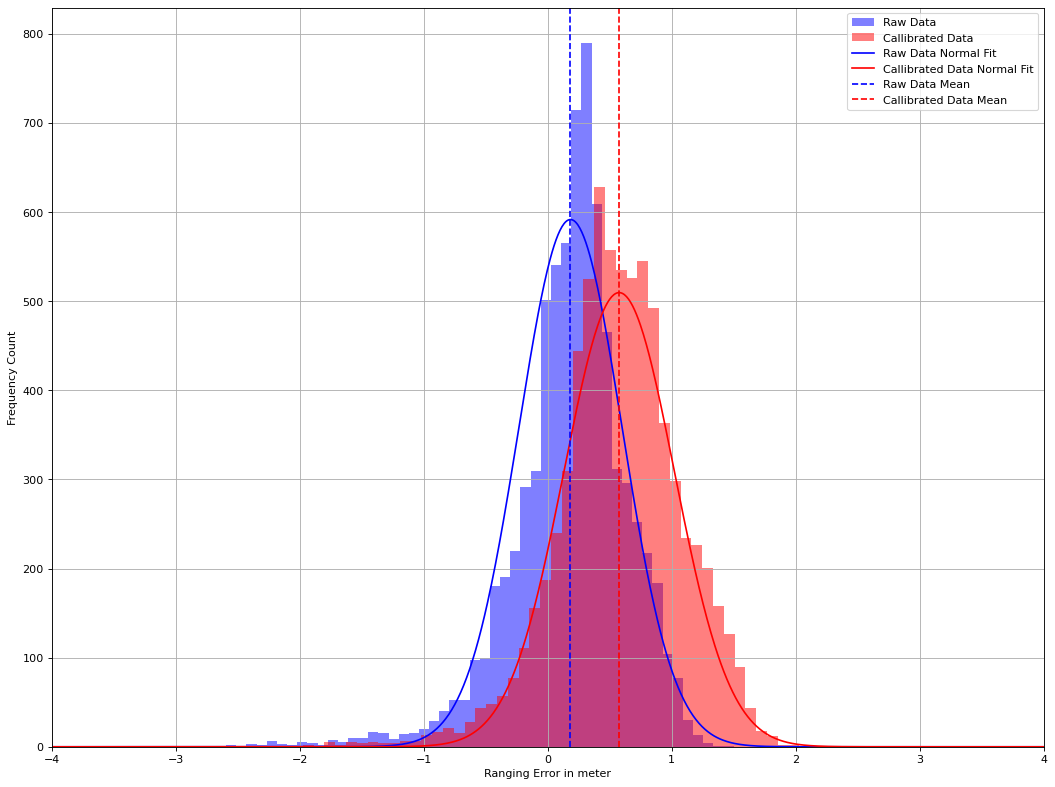

In [13]:
from scipy.stats import norm
from matplotlib.pyplot import figure

data1 = raw_error
data2 = callibrated_error
# bins1 = int(np.ceil((max(data1) - min(data1)) / (2 * np.percentile(data1, 75 - np.percentile(data1, 25)) * len(data1)**(-1/3))))
# bins2 = int(np.ceil((max(data2) - min(data2)) / (2 * np.percentile(data2, 75 - np.percentile(data2, 25)) * len(data2)**(-1/3))))

bins1 = int(np.ceil((max(data1) - min(data1)) / (3.5 * np.std(data1) * len(data1)**(-1/3))))
bins2 = int(np.ceil((max(data2) - min(data2)) / (3.5 * np.std(data2) * len(data2)**(-1/3))))

figure(figsize=(16,12),dpi=80)
plt.hist(raw_error, bins=bins1, alpha=0.5, color='blue', label='Raw Data')
plt.hist(callibrated_error, bins=bins2, alpha=0.5, color='red', label='Callibrated Data')
plt.legend(loc='upper right')
plt.xlabel('Ranging Error in meter')
plt.ylabel('Frequency Count')

xmin, xmax = plt.xlim(-4,4)
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, norm.pdf(x, np.mean(raw_error), np.std(raw_error)*0.9) * len(raw_error)/12, 'b-', label='Raw Data Normal Fit')

plt.plot(x, norm.pdf(x, np.mean(callibrated_error), np.std(callibrated_error)*0.9) * len(callibrated_error)/13, 'r-', label='Callibrated Data Normal Fit')

plt.legend(loc='upper right')

plt.axvline(np.mean(raw_error), color='blue', linestyle='--', label='Raw Data Mean')
plt.axvline(np.mean(callibrated_error), color='red', linestyle='--', label='Callibrated Data Mean')

plt.legend()
plt.grid()
plt.show()